In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/telecom_churn.csv')

# Checking the data

In [4]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

# Split Dependent and Independent

In [80]:
X=df.drop(['churn'],axis=1)
Y=df['churn']

# Missing Value Check

In [77]:
X.isnull().sum()/X.count()

state                     0.0
account length            0.0
area code                 0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
dtype: float64

In [81]:
correlation=X.corr()

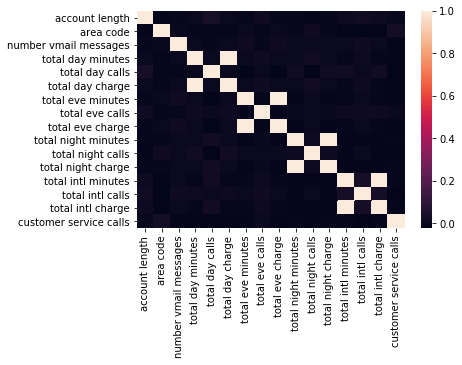

In [82]:
import seaborn as sns
ax=sns.heatmap(correlation)

In [83]:
X=df.drop(['churn','total day charge','total eve charge','total intl charge','total night charge'],axis=1)
Y=df['churn']

# Encoding categorical features

In [84]:
char_features=['state','international plan','voice mail plan']

In [85]:
X_char=pd.get_dummies(X[char_features])

In [86]:
X_num=df.drop(['state','international plan','voice mail plan'],axis=1)

In [87]:
X_all=pd.concat([X_num,X_char],axis=1,join="inner")

In [88]:
X=X_all.drop(['churn'],axis=1)

In [89]:
X.shape

(3333, 71)

# Capping and Flooring of Outliers if Present

In [14]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [15]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.981362,437.182418,8.074707,179.792499,100.482748,30.565254,201.000852,100.129913,17.085312,200.791174,...,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102,0.903090,0.096910,0.723372,0.276628
std,39.276205,42.371290,13.622222,53.535083,19.628346,9.100850,49.821440,19.546408,4.234920,49.519955,...,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251,0.295879,0.295879,0.447398,0.447398
min,12.320000,408.000000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,195.000000,510.000000,43.000000,305.168000,146.000000,51.876800,318.936000,147.000000,27.113600,317.448000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
X.shape

(3333, 71)

# Feature Scaling 

In [90]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_std=pd.DataFrame(stdsc.fit_transform(X),index=X.index,columns=X.columns).add_suffix('_std')

In [91]:
type(X_std)

pandas.core.frame.DataFrame

In [92]:
X_std.head()

,account length_std,area code_std,number vmail messages_std,total day minutes_std,total day calls_std,total day charge_std,total eve minutes_std,total eve calls_std,total eve charge_std,total night minutes_std,...,state_VA_std,state_VT_std,state_WA_std,state_WI_std,state_WV_std,state_WY_std,international plan_no_std,international plan_yes_std,voice mail plan_no_std,voice mail plan_yes_std
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,-1.617086,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,-1.617086,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,0.618396,-0.618396
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685,0.618396,-0.618396
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685,0.618396,-0.618396


# Train Test Split

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,Y, test_size=0.3,random_state=42)

# Check for randomness of train and test by testing the event rates across the two datasets

In [105]:
y_train.mean()

0.14573510501500214

In [106]:
y_test.mean()

0.143

In [108]:
X_test['total eve calls'].std()

19.55531603900547

In [109]:
X_train['total eve calls'].std()

20.081856448464848

In [ ]:
# Building the Naive Bayes Model

In [110]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

# Making Class Predictions

In [111]:
y_pred=clf.predict(X_test)

# Model Evaluation

In [112]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.568
Precision 0.1838074398249453
Recall 0.5874125874125874
f1_score 0.28


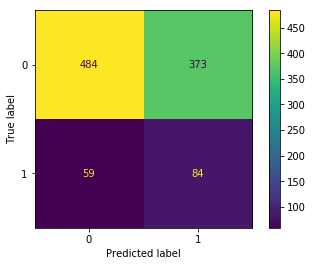

In [113]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [114]:
metrics.roc_auc_score(y_test,y_pred)

0.5760866904390826

# Visualizing the Model Performance - Lorenz Curve

In [115]:
y_pred_prob = clf.predict_proba(X)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank_RF']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank_RF')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.428144,143.0,143.0,0.296066,0.296066,0.10021,0.10021,1,2.954458
1,9,333,0.237237,79.0,222.0,0.163561,0.459627,0.09991,0.20012,2,2.296758
2,8,333,0.147147,49.0,271.0,0.101449,0.561077,0.09991,0.30003,3,1.870068
3,7,333,0.090090,30.0,301.0,0.062112,0.623188,0.09991,0.39994,4,1.558205
4,6,333,0.156156,52.0,353.0,0.107660,0.730849,0.09991,0.49985,5,1.462136
5,5,334,0.122754,41.0,394.0,0.084886,0.815735,0.10021,0.60006,6,1.359422
6,4,333,0.072072,24.0,418.0,0.049689,0.865424,0.09991,0.69997,7,1.236374
7,3,333,0.060060,20.0,438.0,0.041408,0.906832,0.09991,0.79988,8,1.133710
8,2,333,0.078078,26.0,464.0,0.053830,0.960663,0.09991,0.89979,9,1.067652
9,1,334,0.056886,19.0,483.0,0.039337,1.000000,0.10021,1.00000,10,1.000000


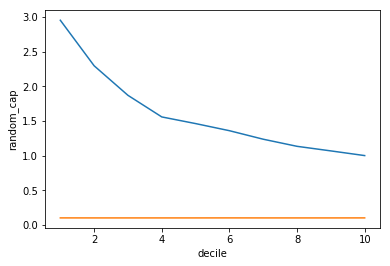

In [116]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)